# 3. Dashboard

### Understanding

Will be using the pickle files for dataframes

Using streamlit for dashboard

In [42]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline


In [24]:
# loading pickles

tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

In [25]:
st.dataframe(tiktok_df)

2024-11-17 14:01:33.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-17 14:01:33.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

streamlit does not run from notebook, so have to write a py file

In [26]:
%%writefile test.py

import streamlit as st
import pandas as pd

# Assuming your pickle files are in the same directory as the script
tiktok_df = pd.read_pickle('tiktok.pkl')
youtube_df = pd.read_pickle('youtube.pkl')

# Display the DataFrames
st.header("DataFrames from Pickle Files")
st.dataframe(tiktok_df.head())
st.dataframe(youtube_df.head())

Overwriting test.py


In [27]:
# running test.py
!streamlit run test.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.8.16:8501
  External URL: http://80.89.73.40:8501

^C
  Stopping...


In [28]:
tiktok_df.head()

,tiktok_duration_sec,tiktok_view_count,tiktok_like_count,tiktok_comment_count,tiktok_total_engagement
0,59,343296.0,19425.0,0.0,362721.0
1,32,140877.0,77355.0,684.0,218916.0
2,31,902185.0,97690.0,329.0,1000204.0
3,25,437506.0,239954.0,584.0,678044.0
4,19,56167.0,34987.0,152.0,91306.0


In [29]:
youtube_df.head()

,youtube_view_count,youtube_like_count,youtube_comment_count,youtube_duration_sec,youtube_total_engagement
0,295836,4617,3632,81.0,304085
1,195318,988,1868,79.0,198174
2,172917,1389,4055,135.0,178361
3,88721,1095,1833,332.0,91649
4,513072,9989,5751,50.0,528812


(array([2099., 1737., 2008., 1719., 2002., 1679., 2043., 1707., 2053.,
        2037.]),
 array([ 5. , 10.5, 16. , 21.5, 27. , 32.5, 38. , 43.5, 49. , 54.5, 60. ]),
 <BarContainer object of 10 artists>)

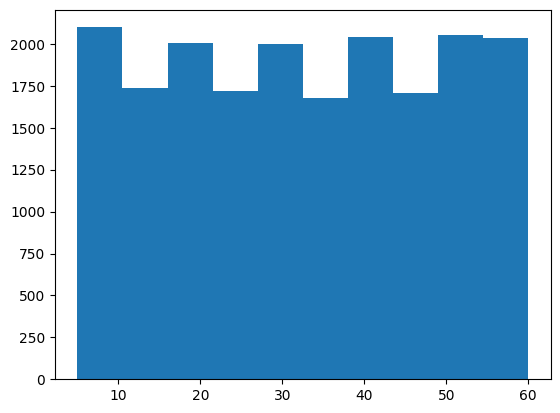

In [53]:
data_to_plot = tiktok_df['tiktok_duration_sec']

plt.hist(data_to_plot, bins=10)


<Axes: xlabel='tiktok_duration_sec', ylabel='Count'>

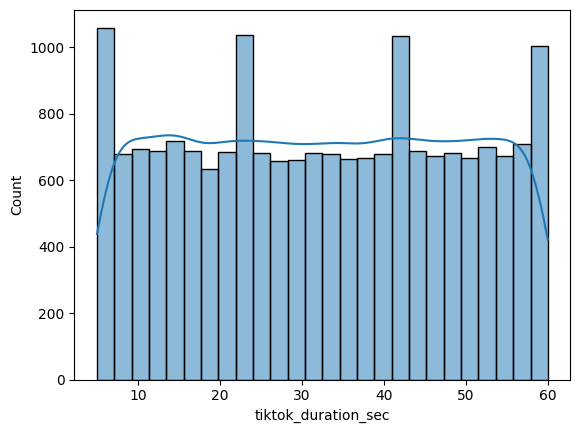

In [49]:
sns.histplot(data_to_plot, kde=True)


(array([798.,  66.,  27.,   5.,   7.,   3.,   1.,   2.,   5.,   0.,   2.,
          0.,   1.,   0.,   3.,   2.,   0.,   1.,   2.,   1.,   4.,   2.,
          1.,   1.,   5.,   0.,   1.,   1.,   1.,   7.]),
 array([8.00000000e+00, 1.43776667e+03, 2.86753333e+03, 4.29730000e+03,
        5.72706667e+03, 7.15683333e+03, 8.58660000e+03, 1.00163667e+04,
        1.14461333e+04, 1.28759000e+04, 1.43056667e+04, 1.57354333e+04,
        1.71652000e+04, 1.85949667e+04, 2.00247333e+04, 2.14545000e+04,
        2.28842667e+04, 2.43140333e+04, 2.57438000e+04, 2.71735667e+04,
        2.86033333e+04, 3.00331000e+04, 3.14628667e+04, 3.28926333e+04,
        3.43224000e+04, 3.57521667e+04, 3.71819333e+04, 3.86117000e+04,
        4.00414667e+04, 4.14712333e+04, 4.29010000e+04]),
 <BarContainer object of 30 artists>)

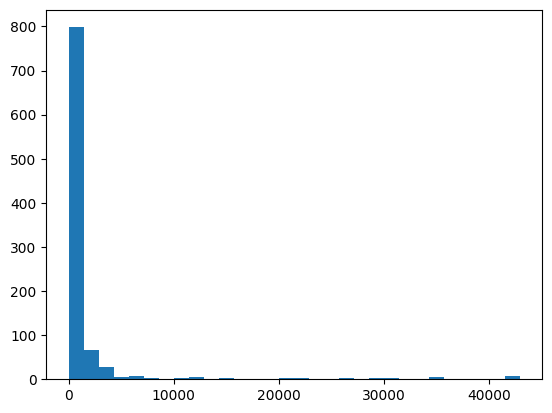

In [57]:
data_to_plot = youtube_df['youtube_duration_sec']

plt.hist(data_to_plot, bins=30)

## Visualizing

### Scatter Plot
Trying scatter plot and regression line

In [36]:

# Scatter Plot Function
def scatter_with_regression(data, x_col, y_col, title):
    plt.figure(figsize=(8, 6))
    
    # Scatterplot with label
    scatter = sns.scatterplot(data=data, x=x_col, y=y_col, alpha=0.6, label="Data Points")
    
    # Regression plot with label
    regplot = sns.regplot(
        data=data, x=x_col, y=y_col, scatter=False, 
        color="red", line_kws={"label": "Regression Line"}
    )
    
    plt.title(title, fontsize=14)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.grid(True)
    plt.show()


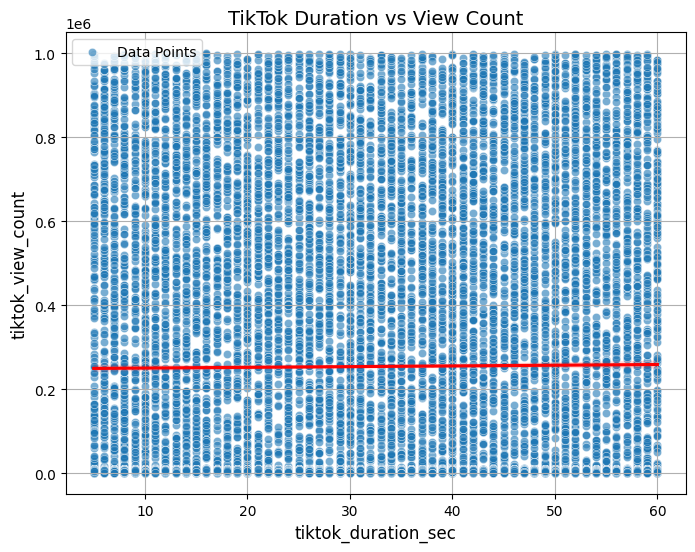

In [37]:
# Generate plots for tiktok data
scatter_with_regression(tiktok_df, 'tiktok_duration_sec', 'tiktok_view_count', 'TikTok Duration vs View Count')


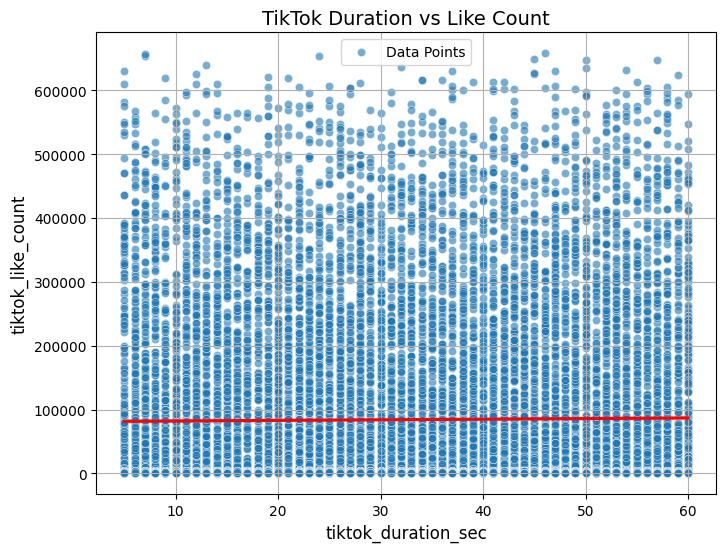

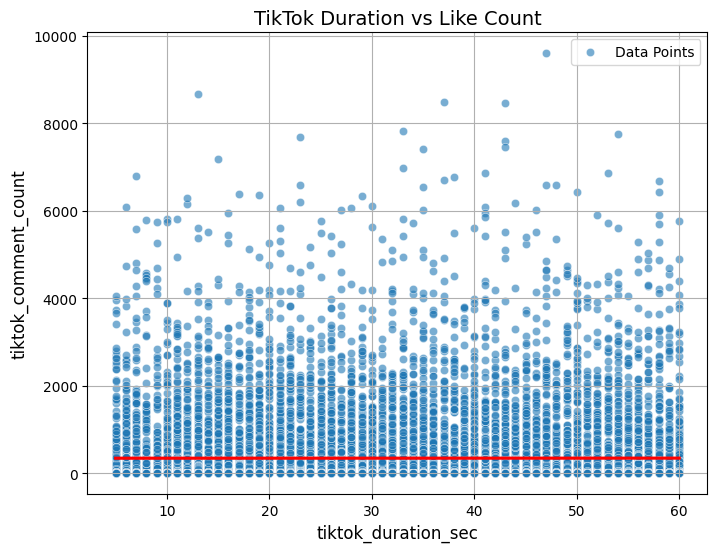

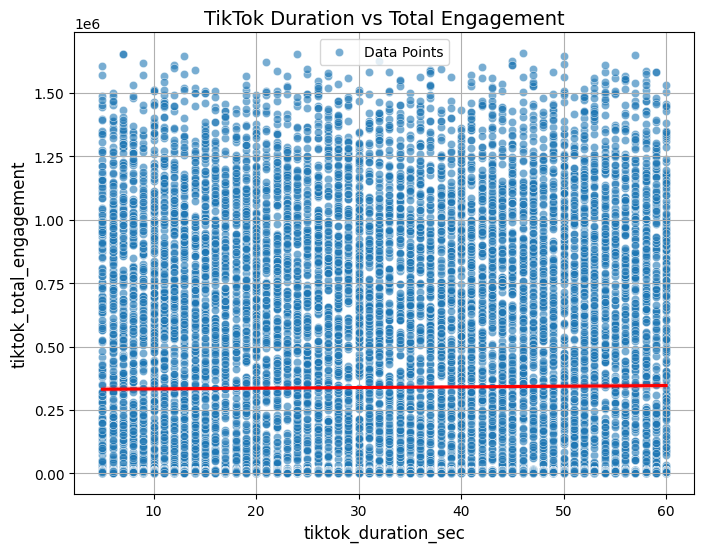

In [38]:
scatter_with_regression(tiktok_df, 'tiktok_duration_sec', 'tiktok_like_count', 'TikTok Duration vs Like Count')
scatter_with_regression(tiktok_df, 'tiktok_duration_sec', 'tiktok_comment_count', 'TikTok Duration vs Like Count')
scatter_with_regression(tiktok_df, 'tiktok_duration_sec', 'tiktok_total_engagement', 'TikTok Duration vs Total Engagement')


Scatterplot shows no correclation

### Histogram
Trying histogram with overlaid counts

In [40]:
# Define function for histogram with overlaid counts
def histogram_with_overlay(data, duration_col, metric_col, bin_size, aggregation_func, title):
    # Create bins for duration
    data['duration_bin'] = pd.cut(data[duration_col], bins=np.arange(0, data[duration_col].max() + bin_size, bin_size))
    
    # Aggregate metric by duration bins
    aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
    aggregated_data['bin_center'] = aggregated_data['duration_bin'].apply(lambda x: x.mid)
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=duration_col, bins=np.arange(0, data[duration_col].max() + bin_size, bin_size), color="skyblue", kde=False, label='Duration Histogram')
    
    # Overlay aggregated metric (mean/median)
    plt.plot(aggregated_data['bin_center'], aggregated_data[metric_col], marker='o', color='red', label=f'{aggregation_func.__name__.capitalize()} {metric_col}')
    
    plt.title(title, fontsize=14)
    plt.xlabel(duration_col, fontsize=12)
    plt.ylabel('Frequency / Metric Value', fontsize=12)
    plt.grid(True)
    plt.show()

/tmp/ipykernel_14116/261368273.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_14116/261368273.py:7: FutureWarning: The provided callable <function mean at 0x7e2a7c115310> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


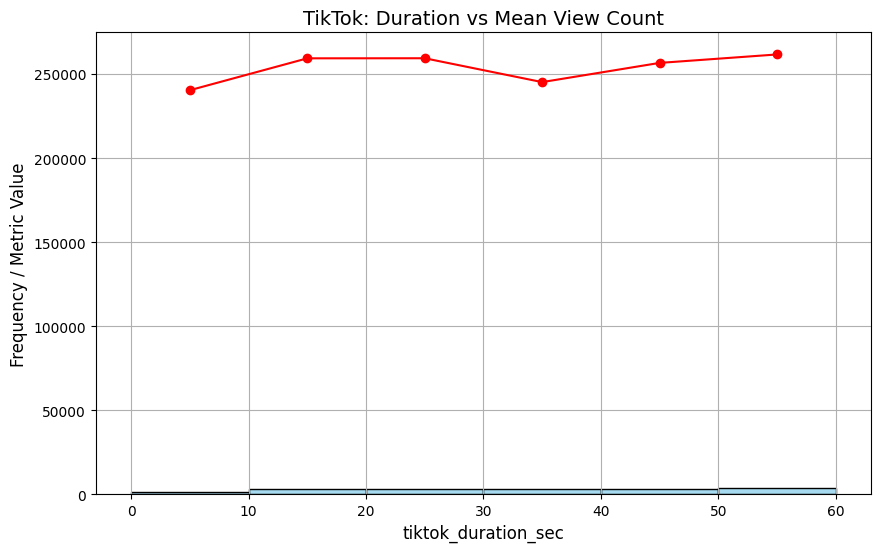

/tmp/ipykernel_14116/261368273.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()
/tmp/ipykernel_14116/261368273.py:7: FutureWarning: The provided callable <function median at 0x7e2a77fb3dc0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  aggregated_data = data.groupby('duration_bin')[metric_col].agg(aggregation_func).reset_index()


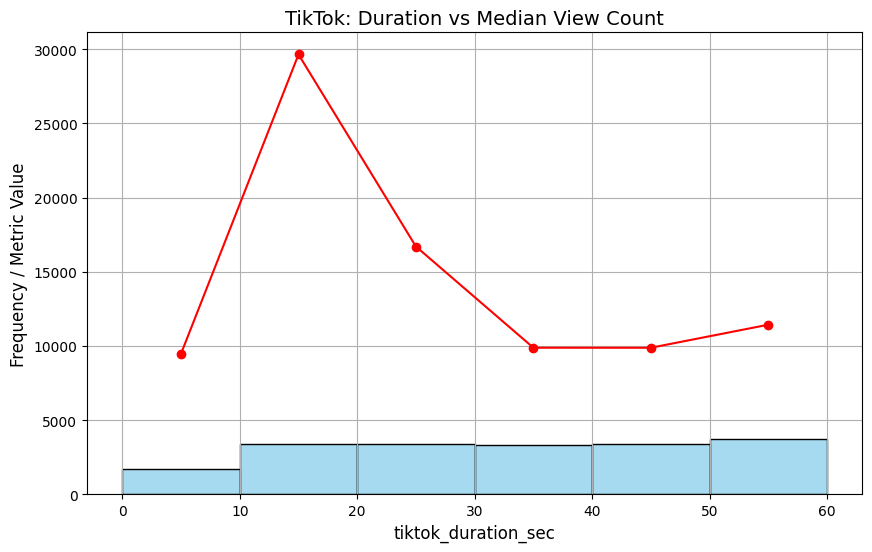

In [45]:
histogram_with_overlay(tiktok_df, 'tiktok_duration_sec', 'tiktok_view_count', bin_size=10, aggregation_func=np.mean, title='TikTok: Duration vs Mean View Count')
histogram_with_overlay(tiktok_df, 'tiktok_duration_sec', 'tiktok_view_count', bin_size=10, aggregation_func=np.median, title='TikTok: Duration vs Median View Count')
